In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers for the three indices
indices = {
    'NASDAQ': '^IXIC',
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI'
}

# Fetch historical data
data = {name: yf.download(ticker, start="1995-01-01", end="2024-04-01") for name, ticker in indices.items()}

# Ensure all data is fetched
for name, df in data.items():
    if df.empty:
        print(f"Failed to fetch data for {name}")
    else:
        print(f"Data for {name} fetched successfully.")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for NASDAQ fetched successfully.
Data for S&P 500 fetched successfully.
Data for Dow Jones fetched successfully.


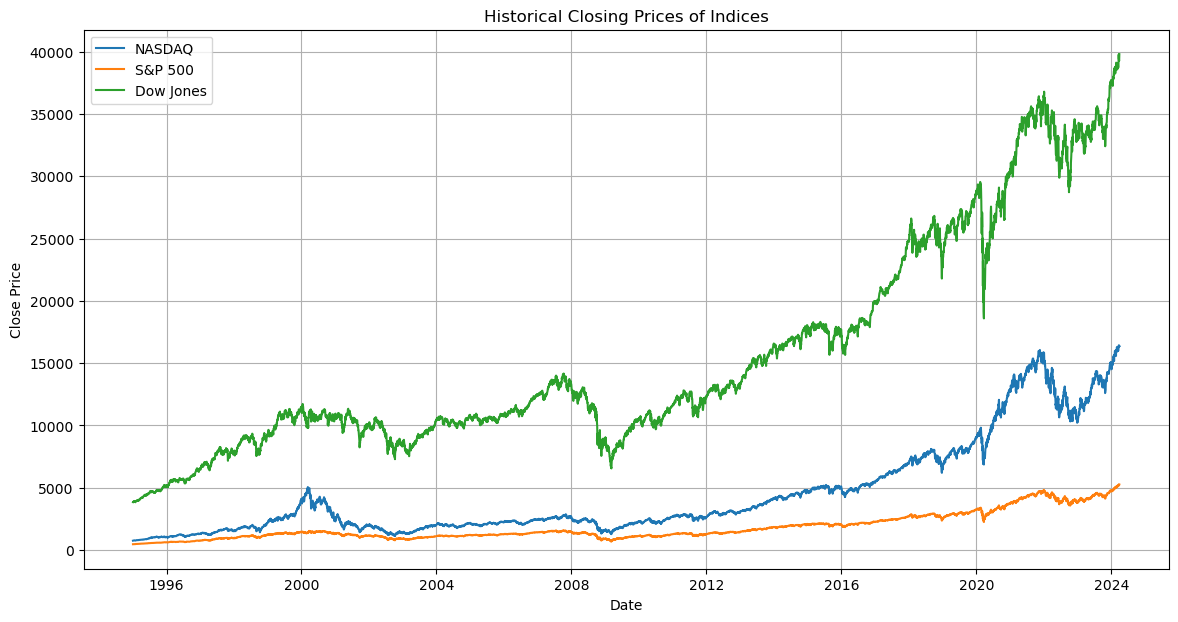

In [3]:
# Create a plot for each index
plt.figure(figsize=(14, 7))
for name, df in data.items():
    plt.plot(df['Close'], label=name)

plt.title('Historical Closing Prices of Indices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import pandas as pd
import numpy as np

def detect_sharp_changes(df, days=2, threshold=15):
    # Calculate the percentage change over the specified number of days
    df['Pct Change'] = df['Close'].pct_change(periods=days) * 100

    # Find dates where the absolute percentage change is greater than the threshold
    significant_changes = df[np.abs(df['Pct Change']) >= threshold]
    return significant_changes

In [7]:
# Define the tickers
indices = {
    'NASDAQ': '^IXIC',
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI'
}

# Parameters for change detection
days = 5
threshold = 15  # 15% rise or fall

# Fetch data and detect changes
data = {}
significant_changes = {}
for name, ticker in indices.items():
    df = yf.download(ticker, start="1995-01-01", end="2024-04-01")
    if df.empty:
        print(f"Failed to fetch data for {name}")
        continue
    print(f"Data for {name} fetched successfully.")
    data[name] = df
    significant_changes[name] = detect_sharp_changes(df, days=days, threshold=threshold)

    # Print periods of significant changes
    if not significant_changes[name].empty:
        print(f"Significant changes for {name}:", significant_changes[name][['Close', 'Pct Change']])
    else:
        print(f"No significant changes detected for {name} exceeding {threshold}% in {days} days.")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for NASDAQ fetched successfully.
Significant changes for NASDAQ:                   Close  Pct Change
Date                               
1998-08-31  1499.250000  -16.281366
2000-04-14  3321.290039  -25.304684
2000-04-17  3539.159912  -15.496878
2000-06-02  3813.379883   18.969216
2000-06-05  3821.760010   19.239586
2000-12-11  3015.100098   15.267136
2000-12-20  2332.780029  -17.358481
2001-04-03  1673.000000  -15.172165
2001-04-11  1898.949951   15.874414
2001-09-21  1423.189941  -16.054811
2008-10-07  1754.880005  -16.109906
2008-10-08  1740.329956  -15.901709
2008-10-09  1645.119995  -16.775263
2008-10-10  1649.510010  -15.296371
2008-11-20  1316.119995  -17.572491
2008-11-28  1535.569946   16.674008
2020-03-12  7201.799805  -17.586248
Data for S&P 500 fetched successfully.
Significant changes for S&P 500:                   Close  Pct Change
Date                               
2008-10-08   984.940002  -15.168901
2008-10-09   909.919983  -18.340098
2008-10-10   899.219971  -18.1

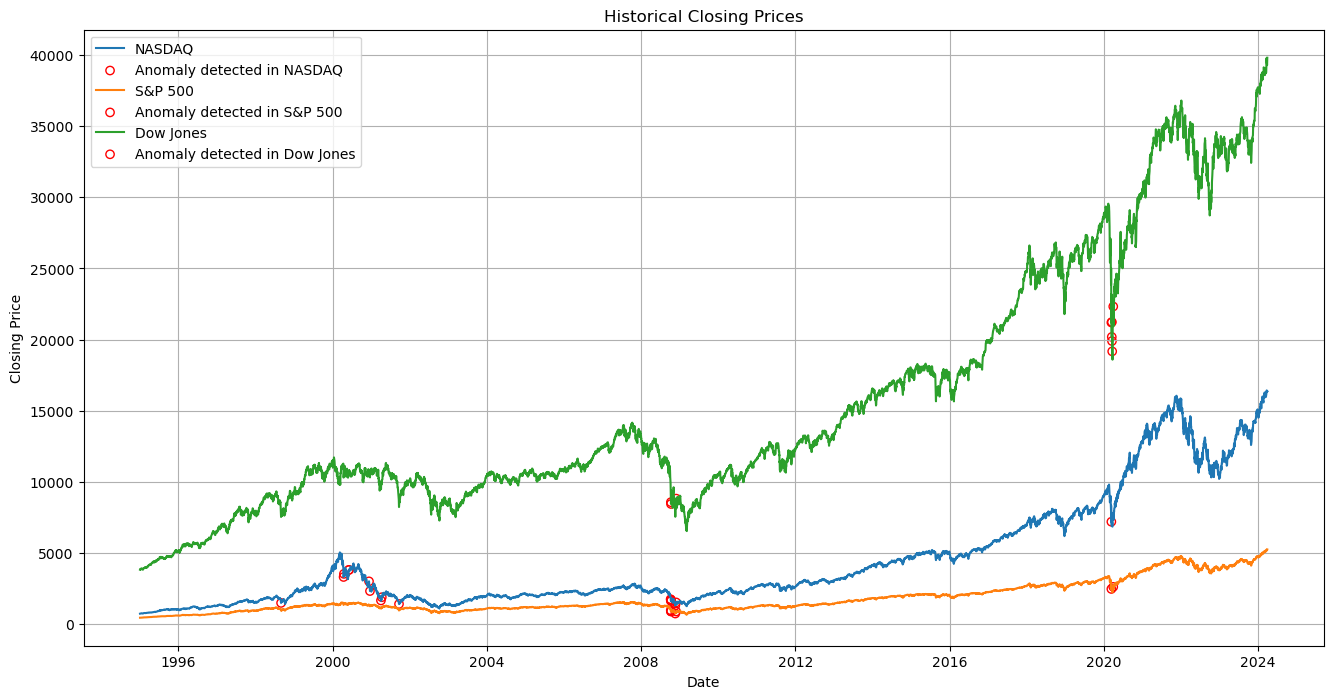

In [8]:
plt.figure(figsize=(16, 8))
for name, df in data.items():
    plt.plot(df['Close'], label=name)
    # Annotate significant changes
    if not significant_changes[name].empty:
        plt.scatter(significant_changes[name].index, significant_changes[name]['Close'], facecolors='none', edgecolors='r', label=f"Anomaly detected in {name}")

plt.title('Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

April 2000 --> Dot com bubble crash 
September / October 2008 --> Wall Street - Lehman Brothers  crash 
March 2020 --> Covid 19 crash 